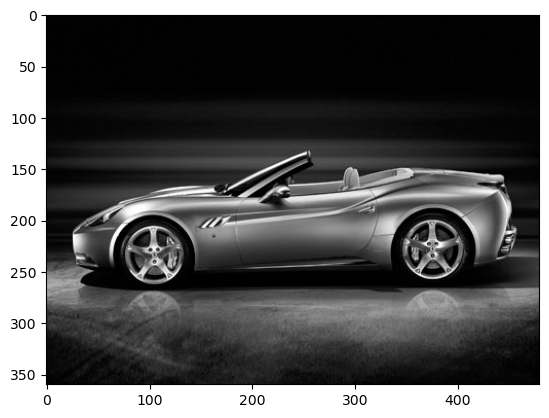

In [4]:
# libraries allowed
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math as m

# use two pictures as reference
# read the image
car_image = cv2.imread('./sport_car.png')

# print the image

plt.imshow(car_image)
plt.show()

In [5]:
def genranmatrices(rows=512, cols=512):
    t1 = np.random.randint(0, 256, (rows, cols), dtype=np.uint8)
    t2 = np.random.randint(0, 256, (rows, cols), dtype=np.uint8)
    return t1, t2

def genNoise(img):
    # gray level check
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # generate a matrix with the same size as the input function
    x, y = img.shape
    t1, t2 = genranmatrices(x, y)
    
    # copy image just in case
    noisy_img = img.copy()
    
    # generate the required noise
    noisy_img[img > t1] = 255
    noisy_img[img < t2] = 0
    return noisy_img

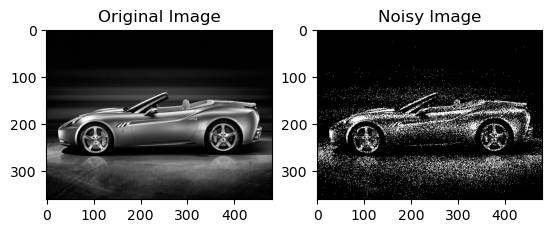

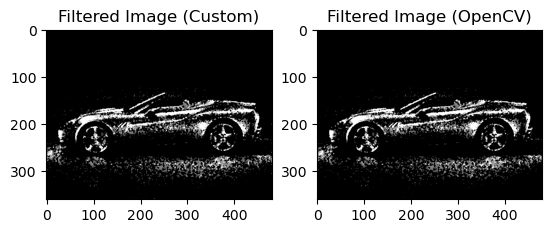

In [6]:
# Implement a median filter of size 3 × 3 medianFilter(img)

def medianFilter(img):
    # create a copy
    filtered_img = img.copy()
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # get the 3x3 pixel (8个)
            neighbors = img[i - 1:i + 2, j - 1:j + 2].flatten()
            # median
            filtered_img[i, j] = np.median(neighbors)
    return filtered_img

# generate noise image
noisy_img = genNoise(car_image)

# median filters
filtered_img_custom = medianFilter(noisy_img)
filtered_img_opencv = cv2.medianBlur(noisy_img, 3)

# show pictures
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(car_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
    
plt.show()
    
plt.subplot(1, 2, 1)
plt.title("Filtered Image (Custom)")
plt.imshow(filtered_img_custom, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filtered Image (OpenCV)")
plt.imshow(filtered_img_opencv, cmap='gray')

plt.show()